In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'X_train' is not defined

In [20]:
from scripts.preprocess import preprocess_data

In [21]:
file_path = "data/Churn_Modelling.csv"
X_train, X_test, y_train, y_test = preprocess_data(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Churn_Modelling.csv'

In [22]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\himan\Downloads\CustomerChurnPrediction\notebooks


In [23]:

os.chdir("c:\\Users\\himan\\Downloads\\CustomerChurnPrediction\\notebooks")  # Replace with your project path
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\himan\Downloads\CustomerChurnPrediction\notebooks


In [24]:
import os
file_path = "data/Churn_Modelling.csv"
print(f"File exists: {os.path.exists(file_path)}")

File exists: False


In [25]:
import os

# Check the contents of the "data" folder
data_dir = "../data"  # Adjust path based on your project structure
if os.path.exists(data_dir):
    print("Contents of the data directory:", os.listdir(data_dir))
else:
    print(f"Data directory not found at {data_dir}")


Contents of the data directory: ['Churn_Modelling.csv']


In [26]:
file_path = "../data/Churn_Modelling.csv"


In [28]:
import os

file_path = "../data/Churn_Modelling.csv"
print(f"File exists: {os.path.exists(file_path)}")

File exists: True


In [29]:
from scripts.preprocess import preprocess_data

# Set the file path
file_path = "../data/Churn_Modelling.csv"

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(file_path)

# Verify preprocessing success
print("Preprocessing successful!")
print(f"X_train shape: {X_train.shape}")
print(f"y_train distribution: {y_train.value_counts().to_dict()}")


Preprocessing successful!
X_train shape: (8000, 11)
y_train distribution: {0: 6356, 1: 1644}


In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.preprocess import preprocess_data


In [31]:
# Preprocess the data
file_path = "../data/Churn_Modelling.csv"
X_train, X_test, y_train, y_test = preprocess_data(file_path)

# Verify the data shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train distribution: {y_train.value_counts().to_dict()}")


X_train shape: (8000, 11)
y_train distribution: {0: 6356, 1: 1644}


In [32]:
# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix - Logistic Regression:")
print(conf_matrix)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix - Logistic Regression:
[[1543   64]
 [ 314   79]]


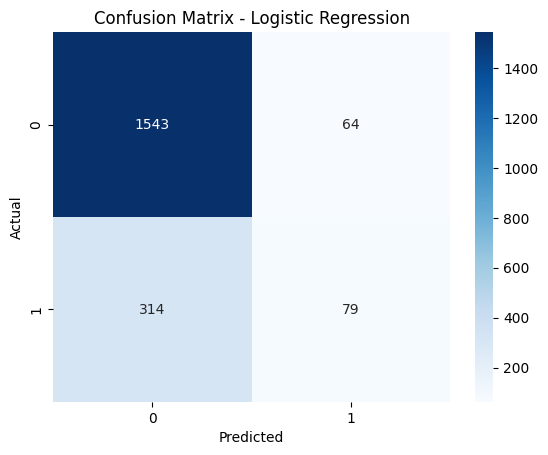

In [33]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


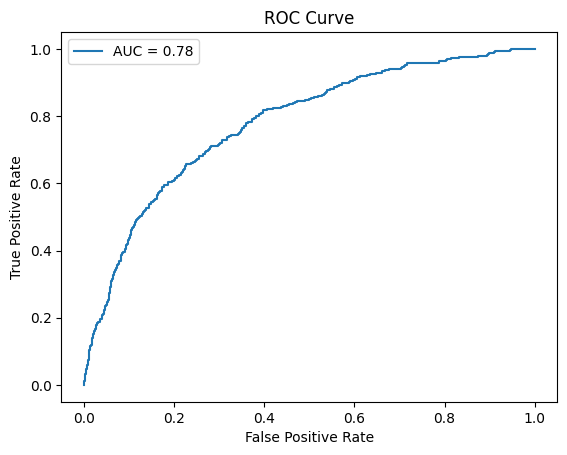

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [35]:
import joblib

# Save the trained model
joblib.dump(logistic_model, "../models/logistic_model.pkl")
print("Model saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '../models/logistic_model.pkl'

In [36]:
import os

# Ensure the "models" directory exists
models_dir = "../models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [37]:
import joblib

# Save the trained model
joblib.dump(logistic_model, os.path.join(models_dir, "logistic_model.pkl"))
print("Model saved successfully!")


Model saved successfully!


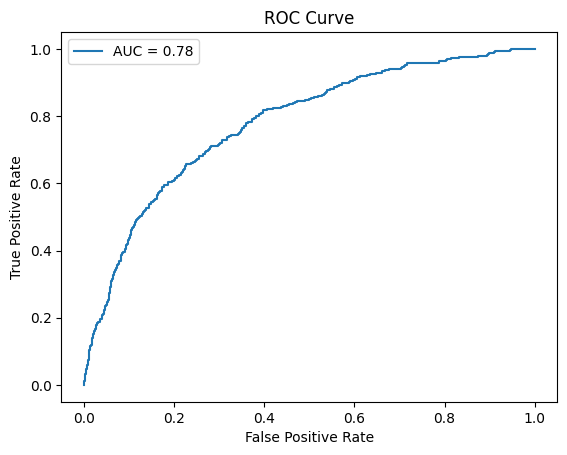

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [43]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'

In [45]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


ModuleNotFoundError: No module named 'xgboost'